## A first look at the dataset

In [3]:
import polars as pl

In [4]:
GERMAN_CREDIT_LINK = "https://raw.githubusercontent.com/IBM/monitor-wml-model-with-watson-openscale/master/data/german_credit_data_biased_training.csv"
german_credit = pl.read_csv(GERMAN_CREDIT_LINK)

In [5]:
german_credit.head()

CheckingStatus,LoanDuration,CreditHistory,LoanPurpose,LoanAmount,ExistingSavings,EmploymentDuration,InstallmentPercent,Sex,OthersOnLoan,CurrentResidenceDuration,OwnsProperty,Age,InstallmentPlans,Housing,ExistingCreditsCount,Job,Dependents,Telephone,ForeignWorker,Risk
str,i64,str,str,i64,str,str,i64,str,str,i64,str,i64,str,str,i64,str,i64,str,str,str
"""0_to_200""",31,"""credits_paid_to_date""","""other""",1889,"""100_to_500""","""less_1""",3,"""female""","""none""",3,"""savings_insurance""",32,"""none""","""own""",1,"""skilled""",1,"""none""","""yes""","""No Risk"""
"""less_0""",18,"""credits_paid_to_date""","""car_new""",462,"""less_100""","""1_to_4""",2,"""female""","""none""",2,"""savings_insurance""",37,"""stores""","""own""",2,"""skilled""",1,"""none""","""yes""","""No Risk"""
"""less_0""",15,"""prior_payments_delayed""","""furniture""",250,"""less_100""","""1_to_4""",2,"""male""","""none""",3,"""real_estate""",28,"""none""","""own""",2,"""skilled""",1,"""yes""","""no""","""No Risk"""
"""0_to_200""",28,"""credits_paid_to_date""","""retraining""",3693,"""less_100""","""greater_7""",3,"""male""","""none""",2,"""savings_insurance""",32,"""none""","""own""",1,"""skilled""",1,"""none""","""yes""","""No Risk"""
"""no_checking""",28,"""prior_payments_delayed""","""education""",6235,"""500_to_1000""","""greater_7""",3,"""male""","""none""",3,"""unknown""",57,"""none""","""own""",2,"""skilled""",1,"""none""","""yes""","""Risk"""


In [6]:
german_credit.describe()

statistic,CheckingStatus,LoanDuration,CreditHistory,LoanPurpose,LoanAmount,ExistingSavings,EmploymentDuration,InstallmentPercent,Sex,OthersOnLoan,CurrentResidenceDuration,OwnsProperty,Age,InstallmentPlans,Housing,ExistingCreditsCount,Job,Dependents,Telephone,ForeignWorker,Risk
str,str,f64,str,str,f64,str,str,f64,str,str,f64,str,f64,str,str,f64,str,f64,str,str,str
"""count""","""5000""",5000.0,"""5000""","""5000""",5000.0,"""5000""","""5000""",5000.0,"""5000""","""5000""",5000.0,"""5000""",5000.0,"""5000""","""5000""",5000.0,"""5000""",5000.0,"""5000""","""5000""","""5000"""
"""null_count""","""0""",0.0,"""0""","""0""",0.0,"""0""","""0""",0.0,"""0""","""0""",0.0,"""0""",0.0,"""0""","""0""",0.0,"""0""",0.0,"""0""","""0""","""0"""
"""mean""",null,21.393,null,null,3480.145,null,null,2.9824,null,null,2.8542,null,35.9324,null,null,1.4658,null,1.1646,null,null,null
"""std""",null,11.162843,null,null,2488.232783,null,null,1.127096,null,null,1.115702,null,10.648536,null,null,0.565415,null,0.370856,null,null,null
"""min""","""0_to_200""",4.0,"""all_credits_paid_back""","""appliances""",250.0,"""100_to_500""","""1_to_4""",1.0,"""female""","""co-applicant""",1.0,"""car_other""",19.0,"""bank""","""free""",1.0,"""management_self-employed""",1.0,"""none""","""no""","""No Risk"""
"""25%""",null,13.0,null,null,1327.0,null,null,2.0,null,null,2.0,null,28.0,null,null,1.0,null,1.0,null,null,null
"""50%""",null,21.0,null,null,3240.0,null,null,3.0,null,null,3.0,null,36.0,null,null,1.0,null,1.0,null,null,null
"""75%""",null,29.0,null,null,5355.0,null,null,4.0,null,null,4.0,null,44.0,null,null,2.0,null,1.0,null,null,null
"""max""","""no_checking""",64.0,"""prior_payments_delayed""","""vacation""",11676.0,"""unknown""","""unemployed""",6.0,"""male""","""none""",6.0,"""unknown""",74.0,"""stores""","""rent""",4.0,"""unskilled""",2.0,"""yes""","""yes""","""Risk"""


Note that the meaning and the content of each variable is not documented in the csv itself. This will not be an issue to apply "blindly" machine learning methods, but could be a real issue in a realworld situation.

**Question** Can you find a description of this dataset? Of its origin?

**Answer** Here is information about this dataset, provided by UC Irvine Machine Learning Repository https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data

## A second glimpse

In [7]:
import seaborn as sns
import seaborn.objects as so

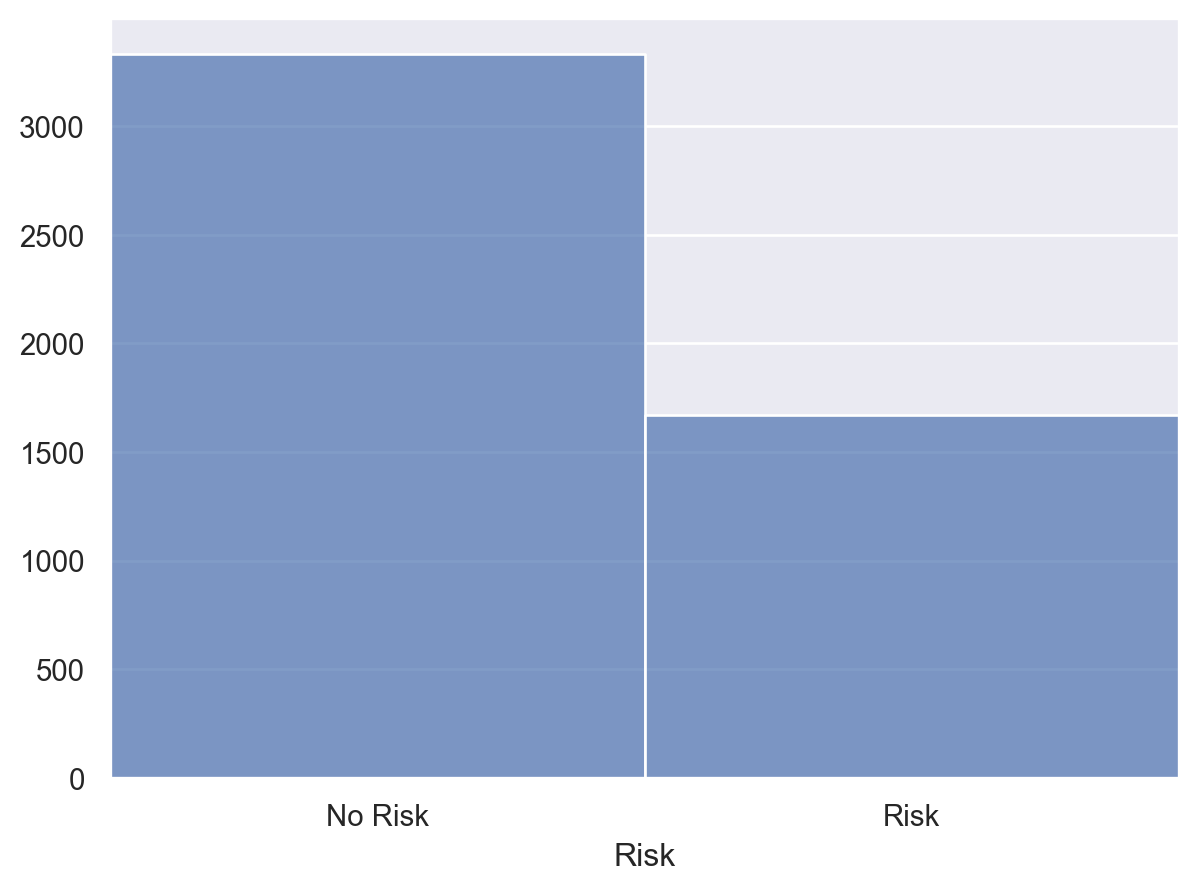

In [8]:
(so.Plot(german_credit, x="Risk")
    .add(so.Bars(), so.Count())
)

We can observe that we have around twice more `No Risk` than `Risk` outcome. It is alway a good idea to look at the real numbers, for instance with

In [9]:
german_credit.group_by("Risk").len().with_columns((pl.col("len") / pl.col("len").sum()).alias("perc"))

Risk,len,perc
str,u32,f64
"""Risk""",1670,0.334
"""No Risk""",3330,0.666


We have thus exactly 1/3 of `Risk` and 2/3 of `No Risk`...

## Predicting the risk ?

We are going to predict the risk using the accuracy as a metrics. This corresponds exactly to the $\ell^{0/1}$ loss, but the accuracy is defined as $1$ minus the expectation of the loss, so that a larger accuracy is better.

**Question** What would be the performance of a dummy classifier always predicting `No Risk`?

**Answer** The performance would be $2/3$

A natural question is now to guess whether one can do better or not. A hint that this is possible is that the `Risk` variable behaves differently depending on the covariates.

**Question** Show that this is the case with the `Sex` variable.

In [15]:
german_credit.filter(
    pl.col("Sex").is_in(["female"])
).group_by("Risk").len().with_columns((pl.col("len") / pl.col("len").sum()).alias("perc"))

Risk,len,perc
str,u32,f64
"""Risk""",561,0.295886
"""No Risk""",1335,0.704114


In [16]:
german_credit.filter(
    pl.col("Sex").is_in(["male"])
).group_by("Risk").len().with_columns((pl.col("len") / pl.col("len").sum()).alias("perc"))

Risk,len,perc
str,u32,f64
"""No Risk""",1995,0.642719
"""Risk""",1109,0.357281


For women, the proportion of risk is $29.6\%$ and for men, this proportion is $35.7\%$

## Basic ML pipeline

To make a prediction, we need to perform two steps: first, we need to transform the input into numerical vectors, and second apply a trained prediction on those numerical vectors. Note that the transformation should also be trained if it depends on variable values, for instance for a normalization.

`Scikit Learn` has a very simple way to define the prediction pipeline and train it afterward.

We need to handle in a different way the numerical variables, that are already numbers, and the categorical one, for which an encoding is required.

In [17]:
import polars.selectors as cs
string_columns = german_credit.select(cs.string()).columns
numerical_columns = german_credit.select(cs.numeric()).columns

We are now ready to import `scikit learn`, use a one hot encoding for the categorical variables, a standardization for the numerical ones, and a nearest neighbors classifier:

In [18]:
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [30]:
categorical_features = string_columns.copy()
categorical_features.remove('Risk')
categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])
numerical_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

preprocessor = ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, categorical_features),
            ('num', numerical_transformer, numerical_columns)
        ],
        remainder='passthrough',
        force_int_remainder_cols=False
    )

pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier())
    ]).set_output(transform="polars")

Training the pipeline is as simple as

In [31]:
X = german_credit.drop('Risk')
y = german_credit['Risk']
pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['CheckingStatus',
                                                   'CreditHistory',
                                                   'LoanPurpose',
                                                   'ExistingSavings',
                                                   'EmploymentDuration', 'Sex',
                                                   'OthersOnLoan',
                                                   'OwnsProperty',
                                                   'InstallmentPlans',
                                                   'Housing', 'Job',
                                                   'Telephone',
                                                   'ForeignWorker']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['LoanDuration', 'LoanAmount',
                                                   'InstallmentPercent',
                                                   'CurrentResidenceDuration',
                                                   'Age',
                                                   'ExistingCreditsCount',
                                                   'Dependents'])])),
                ('classifier', KNeighborsClassifier())])

and indeed, one can use the pipeline to obtain prediction

In [21]:
pipeline.predict(X)

array(['No Risk', 'No Risk', 'No Risk', ..., 'Risk', 'Risk', 'No Risk'],
      dtype='<U7')

and compute a score

In [22]:
pipeline.score(X, y)

0.8426

**Question** Replace the nearest neighbors by a logistic regression.

In [32]:
logit_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression())
    ]
).set_output(transform="polars")

In [33]:
X = german_credit.drop('Risk')
y = german_credit['Risk']
logit_pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['CheckingStatus',
                                                   'CreditHistory',
                                                   'LoanPurpose',
                                                   'ExistingSavings',
                                                   'EmploymentDuration', 'Sex',
                                                   'OthersOnLoan',
                                                   'OwnsProperty',
                                                   'InstallmentPlans',
                                                   'Housing', 'Job',
                                                   'Telephone',
                                                   'ForeignWorker']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['LoanDuration', 'LoanAmount',
                                                   'InstallmentPercent',
                                                   'CurrentResidenceDuration',
                                                   'Age',
                                                   'ExistingCreditsCount',
                                                   'Dependents'])])),
                ('classifier', LogisticRegression())])

In [34]:
logit_pipeline.score(X, y)

0.8042

## Error estimation and model comparison

**Question** Why are the previous scores optimistic?

**Answer** We used the training data for validation.

We need thus to be careful and always test predictors with data that have never been used before. `Scikit learn` has a nice way to do that.

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


We can then train and test on different data(sub)set

In [36]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['CheckingStatus',
                                                   'CreditHistory',
                                                   'LoanPurpose',
                                                   'ExistingSavings',
                                                   'EmploymentDuration', 'Sex',
                                                   'OthersOnLoan',
                                                   'OwnsProperty',
                                                   'InstallmentPlans',
                                                   'Housing', 'Job',
                                                   'Telephone',
                                                   'ForeignWorker']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['LoanDuration', 'LoanAmount',
                                                   'InstallmentPercent',
                                                   'CurrentResidenceDuration',
                                                   'Age',
                                                   'ExistingCreditsCount',
                                                   'Dependents'])])),
                ('classifier', KNeighborsClassifier())])

In [37]:
pipeline.score(X_test, y_test)

0.766

In [38]:
pipeline.score(X_train, y_train)

0.84275

The optimism of testing on the training set is obvious here! The estimation error term dominates the approximation error ones.

**Question** What about the logistic regression pipeline ?

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logit_pipeline.fit(X_train, y_train)
print(f"Training score: {logit_pipeline.score(X_train, y_train)}")
print(f"Test score: {logit_pipeline.score(X_test, y_test)}")

Training score: 0.807
Test score: 0.793


**Answer** The test score is lower than training score for the logistic regression pipeline too. However, even if the training score was better for the k-NN classifier, the Logistic regression classifier is better in term of test score.

## V-fold cross validation

V-fold cross validation is a way to obtain a good error estimate using only the training set. We can use the builtin `cross_val_error` to obtain such an estimate:

In [41]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, X_train, y_train, cv=5)
scores

array([0.78   , 0.76375, 0.7625 , 0.76875, 0.76875])

In [42]:
scores.mean()

np.float64(0.76875)

**Question** What about the logistic regression?

In [43]:
logit_scores = cross_val_score(logit_pipeline, X_train, y_train, cv=5)
logit_scores.mean()

np.float64(0.8004999999999999)

**Question** Can you reproduce those results using `KFold` ?

In [46]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
scores = cross_val_score(pipeline, X_train, y_train, cv=kf)
scores

array([0.78   , 0.76375, 0.76625, 0.76625, 0.77   ])

## Learning curve

A interesting diagnostic tool is the learning curve which shows the evolution of error with respect to the number of samples.

**Question** Can you compute such a curve for the two pipelines we have used so far? What can you say about the results?

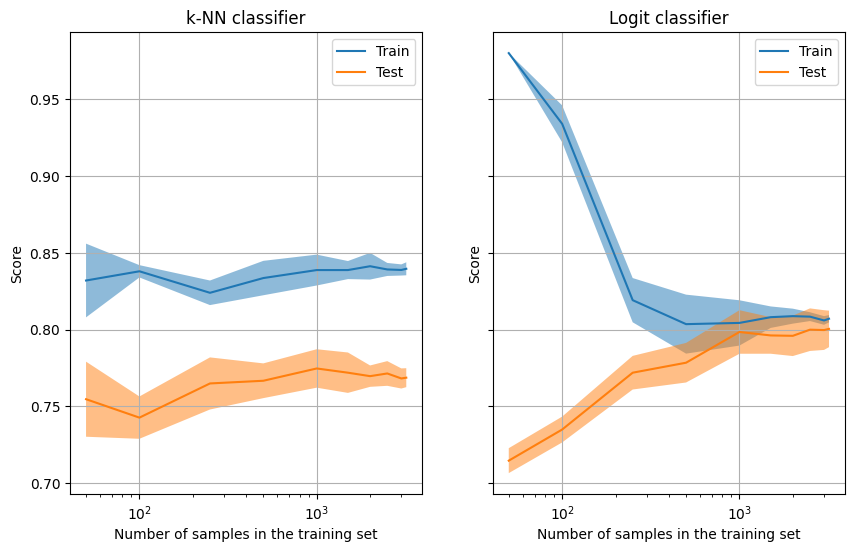

In [64]:
from sklearn.model_selection import LearningCurveDisplay
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 6))

TRAIN_SIZES = [50, 100, 250, 500, 1000, 1500, 2000, 2500, 3000, 3200]

LearningCurveDisplay.from_estimator(
   pipeline, 
   X_train, y_train, cv=5, train_sizes=TRAIN_SIZES,
   ax=ax1,
)
LearningCurveDisplay.from_estimator(
   logit_pipeline, 
   X_train, y_train, cv=5, train_sizes=TRAIN_SIZES,
   ax=ax2,
)

ax1.set_title("k-NN classifier")
ax1.grid(True)
ax2.set_title("Logit classifier")
ax2.grid(True)

plt.show()

**Answer** For the logistic regression classifier, the training accuracy decreases and the test accuracy increases as the training set becomes larger. The k-NN classifier in contract is independent from the training size.